In [1]:
import sys
import os
sys.path.append("/home/smets/codes/far/PHARE/pyphare/")
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.pharesee.hierarchy import rename
import numpy as np
%matplotlib inline

In [2]:
# run_path = "/DATA/phare/harris/tiny" # Tiny Harris run on kaa
run_path = "/home/smets/codes/far/farMe/Harris/tiny/run"
os.listdir(run_path)

['checks',
 '.log',
 '__pycache__',
 'EM_B.h5',
 'EM_E.h5',
 'harris.py',
 'ions_bulkVelocity.h5',
 'ions_density.h5',
 'ions_mass_density.h5',
 'ions_pop_protons_density.h5',
 'ions_pop_protons_domain.h5',
 'ions_pop_protons_flux.h5',
 'job.sh']

In [3]:
run  = Run(run_path)
time = 0.0

In [4]:
v = run.GetVi(time)
b = run.GetB(time, all_primal=False)
type(b)

pyphare.pharesee.hierarchy.PatchHierarchy

In [5]:
v.get_names()

['Vx', 'Vy', 'Vz']

In [6]:
for ilvl, lvl in v.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['Vx', 'Vy', 'Vz']
id         : p0#0
box        : Box([0, 0],[57, 57])
size [Vx]  : [63 63]   -   ['primal', 'primal']
size [Vy]  : [63 63]   -   ['primal', 'primal']
size [Vz]  : [63 63]   -   ['primal', 'primal']
 --- 


In [7]:
w = dot(v, v)

In [8]:
type(v)

pyphare.pharesee.hierarchy.VectorField

In [9]:
for ilvl, lvl in v.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['Vx', 'Vy', 'Vz']
id         : p0#0
box        : Box([0, 0],[57, 57])
size [Vx]  : [63 63]   -   ['primal', 'primal']
size [Vy]  : [63 63]   -   ['primal', 'primal']
size [Vz]  : [63 63]   -   ['primal', 'primal']
 --- 


(<Figure size 640x480 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

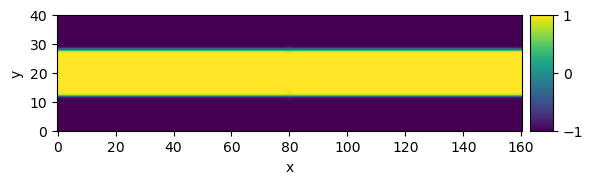

In [10]:
b.plot(qty='Bx',
       # vmin=-1.2,
       # vmax=1.2,
       cmap='viridis')

In [11]:
B = run.GetB(time, all_primal=True)
type(B)

pyphare.pharesee.hierarchy.VectorField

In [12]:
for ilvl, lvl in B.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['x', 'y', 'z']
id         : p0#0
box        : Box([0, 0],[57, 57])
size [x]  : [63 63]   -   ['primal', 'primal']
size [y]  : [63 63]   -   ['primal', 'primal']
size [z]  : [63 63]   -   ['primal', 'primal']
 --- 


(<Figure size 640x480 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

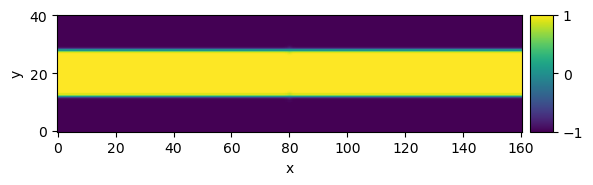

In [13]:
B.plot(qty='x',
       # vmin=-1.2,
       # vmax=1.2,
       cmap='viridis')

In [14]:
c = dot(B, B)

In [15]:
d = sqrt(c)

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

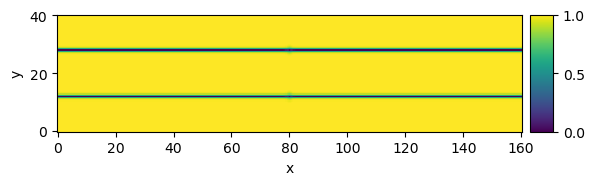

In [16]:
d.plot(qty='value',
       # vmin=0.,
       # vmax=1.,
       cmap='viridis')

In [17]:
d.value.plot(
       # vmin=0.,
       # vmax=1.,
       cmap='viridis')

AttributeError: 'ScalarField' object has no attribute 'value'

In [18]:
B.x

In [19]:
e = modulus(B)

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

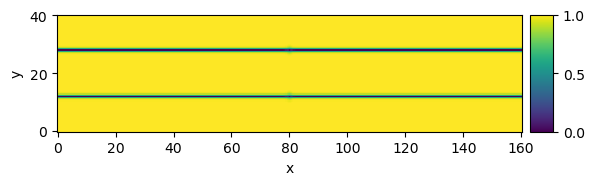

In [20]:
e.plot(qty='value',
       # vmin=0.,
       # vmax=1.,
       cmap='viridis')

In [21]:
e = 2*B

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

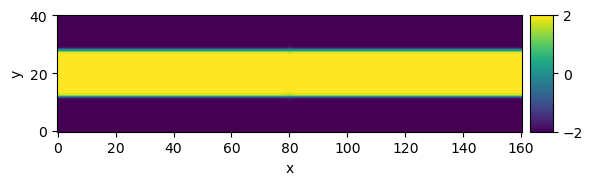

In [22]:
e.plot(qty='x',
       # vmin=-2.2,
       # vmax=2.2,
       cmap='viridis')

In [23]:
f=B*2

In [24]:
type(f)

pyphare.pharesee.hierarchy.VectorField

In [25]:
E = run.GetE(time, all_primal=True)

In [26]:
g = cross(E, B)

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

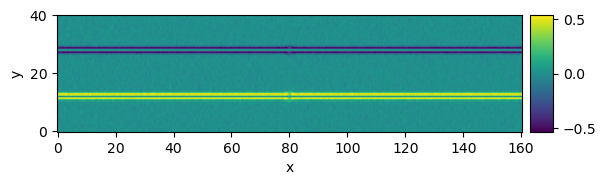

In [27]:
g.plot(qty='z',
       # vmin=-0.02,
       # vmax=0.02,
       cmap='viridis')

In [28]:
i = -B

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

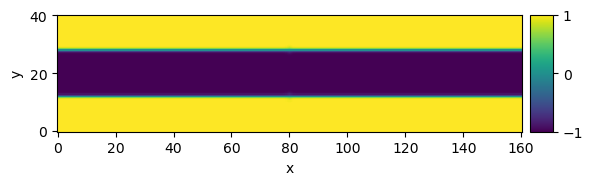

In [29]:
i.plot(qty='x',
       # vmin=-0.02,
       # vmax=0.02,
       cmap='viridis')

In [30]:
N = run.GetNi(time, all_primal=True)

In [31]:
type(N)
N.quantities()
N.value

AttributeError: 'ScalarField' object has no attribute 'value'

In [32]:
for ilvl, lvl in N.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['value']
id         : p0#0
box        : Box([0, 0],[57, 57])
size [value]  : [63 63]   -   ['primal', 'primal']
 --- 


In [33]:
j = B/(N*10)

In [37]:
B

In [36]:
j.quantities()

['value']

In [34]:
(10*B).quantities()

['x', 'y', 'z']

KeyError: 'x'

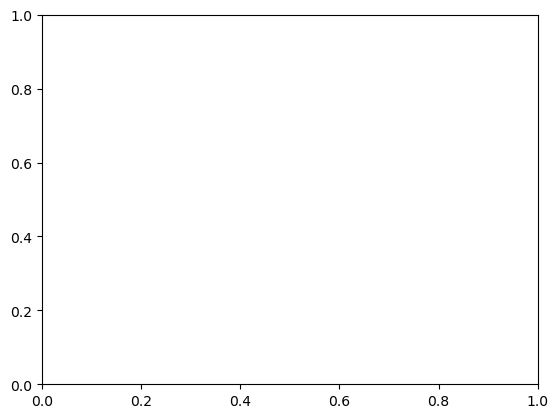

In [35]:
j.plot(qty='x',
       # vmin=-0.2,
       # vmax=0.2,
       cmap='viridis')

In [ ]:
P = run.GetPe(time, all_primal=True)

In [ ]:
P.plot(qty='value',
       #  vmin=0.4,
       #vmax=1.2,
       cmap='viridis')

In [ ]:
q = grad(P)

In [ ]:
type(q)

In [ ]:
q.plot(qty='y',
       # vmin=-0.1,
       # vmax=+0.1,
       cmap='viridis')

In [ ]:
r = grad(P)/N

In [ ]:
N.quantities()

In [ ]:
r.plot(qty='y',
       # vmin=-0.1,
       # vmax=+0.1,
       cmap='viridis')

In [ ]:
# rho = run.GetMassDensity(time)
e = run.GetE(time); print(type(e))
b = run.GetB(time); print(type(b))
r = run.GetNi(time); print(type(r))
n = run.GetN(time, "protons"); print(type(n))
v = run.GetVi(time); print(type(v))
F = run.GetFlux(time, "protons"); print(type(F))
j = run.GetJ(time); print(type(j))

In [ ]:
N+N

In [ ]:
import h5py
# f=h5py.File(os.path.join(run_path, 'EM_B.h5'), 'r')
f=h5py.File(os.path.join(run_path, 'ions_density.h5'), 'r')
print(list(f.attrs))
# print(list(f['t'].keys()))
# print(list(f['t']['2.0000000000'].keys()))
print(list(f))
print(list(f['py_attrs'].attrs.items()))
# print(f['t'].values())